In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

Leemos el fichero de json

In [2]:
# Load the json data
df = pd.read_json('data.json')
print(df.head())

                                               event
0  {'origin': 'merve-device-cellphone', 'module':...
1  {'origin': 'merve-device-cellphone', 'module':...
2  {'origin': 'merve-device-cellphone', 'module':...
3  {'origin': 'merve-device-cellphone', 'module':...
4  {'origin': 'merve-device-cellphone', 'module':...


Observamos cómo acceder a los datos

In [3]:
# Access the data
print("Event (first element):")
print(df['event'][0])
print()
print("Event (first element) origin:")
print(df['event'][0]['origin'])
print()
print("Event (first element) module:")
print(df['event'][0]['module'])
print()
print("Event (first element) interface:")
print(df['event'][0]['interface'])
print()
print("Event (first element) component:")
print(df['event'][0]['component'])
print()
print("Event (first element) payload:")
print(df['event'][0]['payload'])
print()
print("Event (second element):")
print(df['event'][1])
print()
print("Event (second element) origin:")
print(df['event'][1]['origin'])
print()
print("Event (third element):")
print(df['event'][2])
print()
print("Event (fourth element):")
print(df['event'][3])


Event (first element):
{'origin': 'merve-device-cellphone', 'module': '', 'interface': 'dtmi:azureiot:PhoneAsADevice;2', 'component': 'sensors', 'payload': '{"geolocation":{"lat":40.550621,"lon":-3.627754,"alt":738.4000244140625}}'}

Event (first element) origin:
merve-device-cellphone

Event (first element) module:


Event (first element) interface:
dtmi:azureiot:PhoneAsADevice;2

Event (first element) component:
sensors

Event (first element) payload:
{"geolocation":{"lat":40.550621,"lon":-3.627754,"alt":738.4000244140625}}

Event (second element):
{'origin': 'merve-device-cellphone', 'module': '', 'interface': 'dtmi:azureiot:PhoneAsADevice;2', 'component': 'sensors', 'payload': '{"accelerometer":{"x":0.2989500164985657,"y":-0.034950003027915955,"z":9.820950508117676}}'}

Event (second element) origin:
merve-device-cellphone

Event (third element):
{'origin': 'merve-device-cellphone', 'module': '', 'interface': 'dtmi:azureiot:PhoneAsADevice;2', 'component': 'sensors', 'payload': '{"g

Extraemos los datos de cada sensor y los almacenamos en listas individuales (geolocation, battery, accelerometer, gyroscope, magnetometer).

Convertimos las listas de datos en un DataFrame de Pandas.

In [4]:
# Calculate the number of events
print("Number of events:", len(df))

geolocation = []
battery = []
accelerometer = []
gyroscope = []
magnetometer = []

# Iterate over the events in the DataFrame
for index, row in df.iterrows():
    payload = json.loads(row['event']['payload'])
    
    # Check if the payload has a geolocation
    if 'geolocation' in payload:
        geolocation.append(payload['geolocation'])
    # Check if the payload has a battery
    if 'battery' in payload:
        battery.append(payload['battery'])
    # Check if the payload has an accelerometer
    if 'accelerometer' in payload:
        accelerometer.append(payload['accelerometer'])
    # Check if the payload has a gyroscope
    if 'gyroscope' in payload:
        gyroscope.append(payload['gyroscope'])
    # Check if the payload has a magnetometer
    if 'magnetometer' in payload:
        magnetometer.append(payload['magnetometer'])
    
# Convert to dataframe the arrays
geolocation = pd.DataFrame(geolocation)
battery = pd.DataFrame(battery)
accelerometer = pd.DataFrame(accelerometer)
gyroscope = pd.DataFrame(gyroscope)
magnetometer = pd.DataFrame(magnetometer)

# Now you have lists containing the values from the DataFrame
print("Geolocation:")
print(geolocation.head())
print()
print("Battery:")
print(battery.head())
print()
print("Accelerometer:")
print(accelerometer.head())
print()
print("Gyroscope:")
print(gyroscope.head())
print()
print("Magnetometer:")
print(magnetometer.head())

Number of events: 53
Geolocation:
         lat       lon         alt
0  40.550621 -3.627754  738.400024
1  40.550748 -3.627766  735.200012
2  40.550748 -3.627766  735.200012
3  40.550748 -3.627766  735.200012
4  40.550748 -3.627766  735.200012

Battery:
    0
0  50
1  50
2  50
3  50
4  50

Accelerometer:
         x         y         z
0  0.29895 -0.034950  9.820951
1  0.20805  0.057000  9.820951
2  0.08100  2.965950  5.185050
3  6.85605  7.017000  0.949950
4  6.47295  7.446001  0.070950

Gyroscope:
          x         y         z
0  0.000687 -0.000137 -0.000137
1 -0.000412  0.000275 -0.000137
2  0.993437 -0.263862  0.000962
3 -0.071912 -0.044413  0.012650
4  0.066688  0.016225 -0.009762

Magnetometer:
           x          y          z
0   1.312500 -16.443750 -22.556252
1  20.043751 -17.643751 -12.056251
2  -2.700000 -39.112503   0.543750
3 -51.656254  -4.743750  25.256250
4 -51.112503  -6.300000  26.943750


Observamos estadísticas descriptivas (min, max, mean, count) con la función describe()

In [5]:
# Calculate the minimum, maximum, and average values for each sensor
print("Describe of Geolocation:")
print(geolocation.describe().T)
print()
print("Describe of Battery:")
print(battery.describe().T)
print()
print("Describe of Accelerometer:")
print(accelerometer.describe().T)
print()
print("Describe of Gyroscope:")
print(gyroscope.describe().T)
print()
print("Describe of Magnetometer:")
print(magnetometer.describe().T)

Describe of Geolocation:
     count        mean       std         min         25%         50%  \
lat   11.0   40.550736  0.000038   40.550621   40.550748   40.550748   
lon   11.0   -3.627764  0.000003   -3.627766   -3.627766   -3.627766   
alt   11.0  735.490922  0.964840  735.200012  735.200012  735.200012   

            75%         max  
lat   40.550748   40.550748  
lon   -3.627766   -3.627754  
alt  735.200012  738.400024  

Describe of Battery:
   count  mean  std   min   25%   50%   75%   max
0   10.0  50.0  0.0  50.0  50.0  50.0  50.0  50.0

Describe of Accelerometer:
   count      mean       std       min       25%      50%       75%       max
x   11.0 -0.328827  4.796979 -8.281051 -2.829000  0.20805  1.216500  6.856050
y   11.0  2.511109  4.033526 -3.958950 -0.005475  1.33305  6.050025  8.626050
z   11.0  5.488078  3.874725 -0.310950  2.640450  5.73600  8.987475  9.820951

Describe of Gyroscope:
   count      mean       std       min       25%       50%       75%       max
x

Ahora podemos generar gráficos.

Generamos gráficos de scatter para visualizar los datos de geolocalización en dos y tres dimensiones.

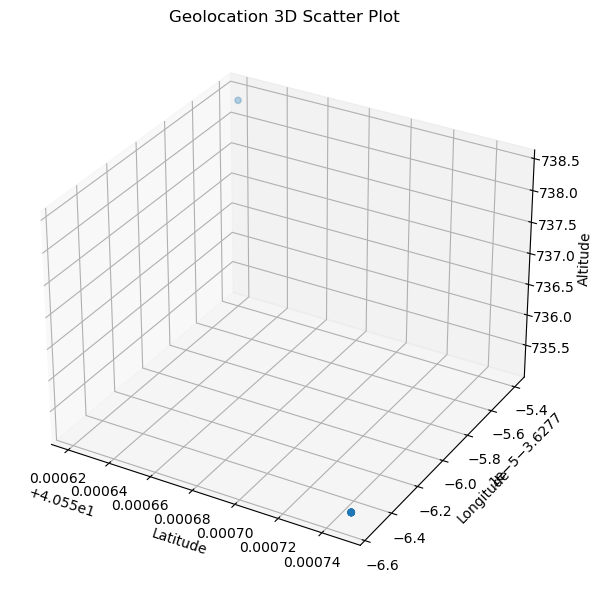

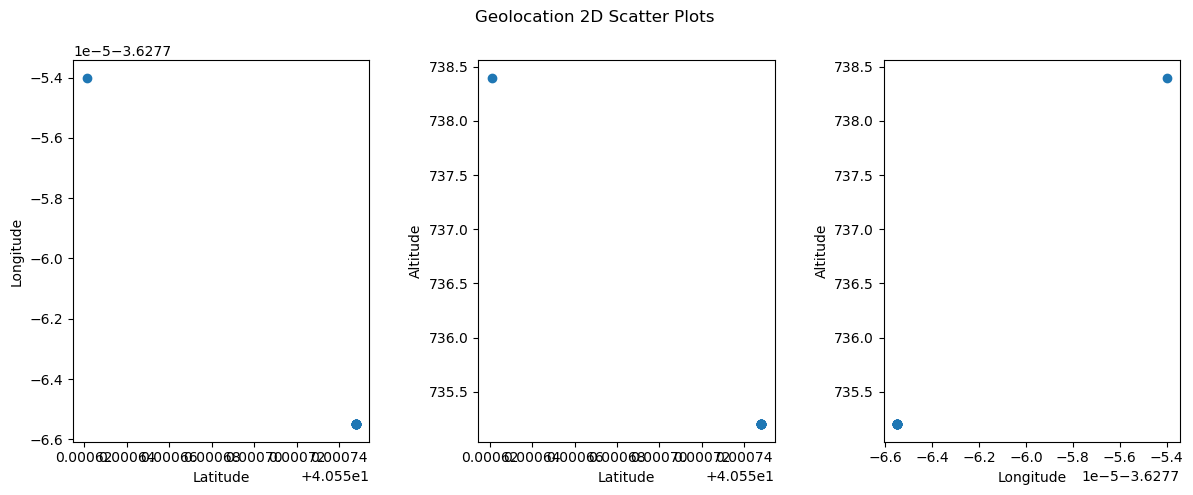

In [6]:
# Plot the scatter plot 3D of the geolocation
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(geolocation['lat'], geolocation['lon'], geolocation['alt'])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')
plt.title('Geolocation 3D Scatter Plot')
plt.tight_layout()
plt.show()

# Plot the scatter plot of the geolocation
# Create a 2D scatter plot
# Plot with subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].scatter(geolocation['lat'], geolocation['lon'])
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Longitude')

ax[1].scatter(geolocation['lat'], geolocation['alt'])
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Altitude')

ax[2].scatter(geolocation['lon'], geolocation['alt'])
ax[2].set_xlabel('Longitude')
ax[2].set_ylabel('Altitude')

plt.suptitle('Geolocation 2D Scatter Plots')
plt.tight_layout()
plt.show()

Generamos un gráfico de histograma para visualizar los cambios en el nivel de la batería a partir de los datos de la batería.

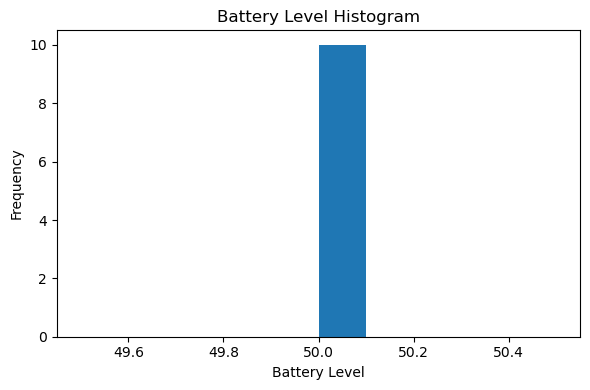

In [7]:
# Plot the histogram of the battery
# Create a histogram
# Arrange figsize
plt.figure(figsize=(6, 4))
plt.hist(battery, bins=10)
plt.xlabel('Battery Level')
plt.ylabel('Frequency')
plt.title('Battery Level Histogram')
plt.tight_layout()
plt.show()

Generamos gráficos de scatter en dos y tres dimensiones para visualizar los cambios de aceleración, gráficos de histogramas y densidad para visualizar la distribución de las lecturas del acelerómetro a lo largo de cada eje (x, y, z) a partir de los datos del accelerometer.

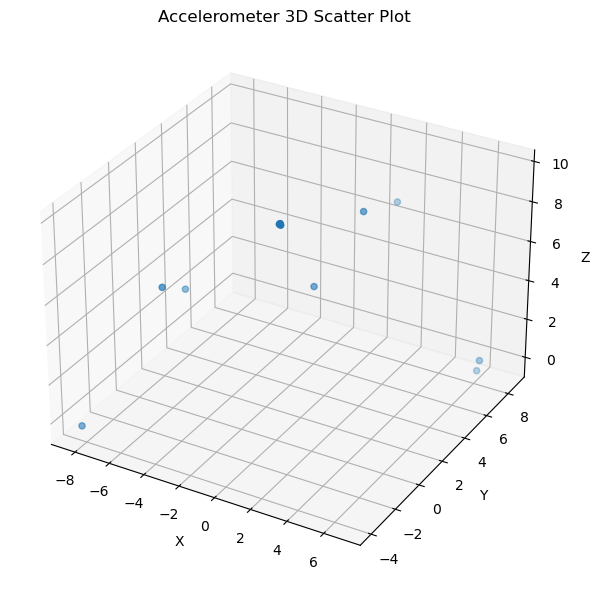

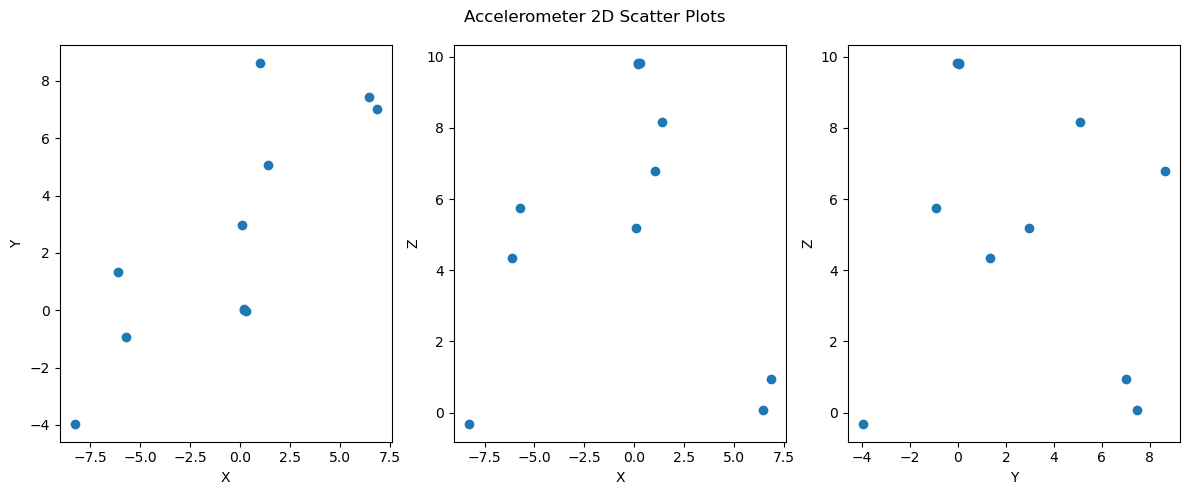

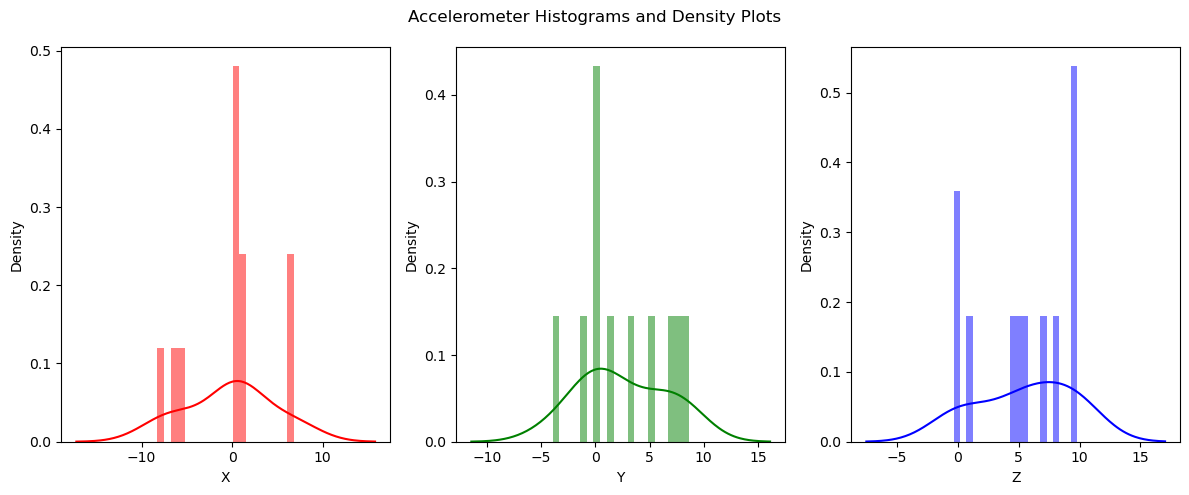

In [8]:
# Plot a scatter plot of the accelerometer
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(accelerometer['x'], accelerometer['y'], accelerometer['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Accelerometer 3D Scatter Plot')
plt.tight_layout()
plt.show()

# Plot the scatter plot of the accelerometer
# Create a 2D scatter plot
# Plot with subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].scatter(accelerometer['x'], accelerometer['y'])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(accelerometer['x'], accelerometer['z'])
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')

ax[2].scatter(accelerometer['y'], accelerometer['z'])
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')

plt.suptitle('Accelerometer 2D Scatter Plots')
plt.tight_layout()
plt.show()


# Plot histograms and density of the accelerometer
# Create a histogram and density plot
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].hist(accelerometer['x'], bins=20, density=True, alpha=0.5, color='r')
sns.kdeplot(accelerometer['x'], ax=ax[0], color='r')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Density')

ax[1].hist(accelerometer['y'], bins=20, density=True, alpha=0.5, color='g')
sns.kdeplot(accelerometer['y'], ax=ax[1], color='g')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Density')

ax[2].hist(accelerometer['z'], bins=20, density=True, alpha=0.5, color='b')
sns.kdeplot(accelerometer['z'], ax=ax[2], color='b')
ax[2].set_xlabel('Z')
ax[2].set_ylabel('Density')

plt.suptitle('Accelerometer Histograms and Density Plots')
plt.tight_layout()
plt.show()

Generamos gráficos de scatter en dos y tres dimensiones para visualizar los cambios de orientación, gráficos de histogramas y densidad para visualizar la distribución de las lecturas del giroscopio a lo largo de cada eje (x, y, z) a partir de los datos del gyroscope.

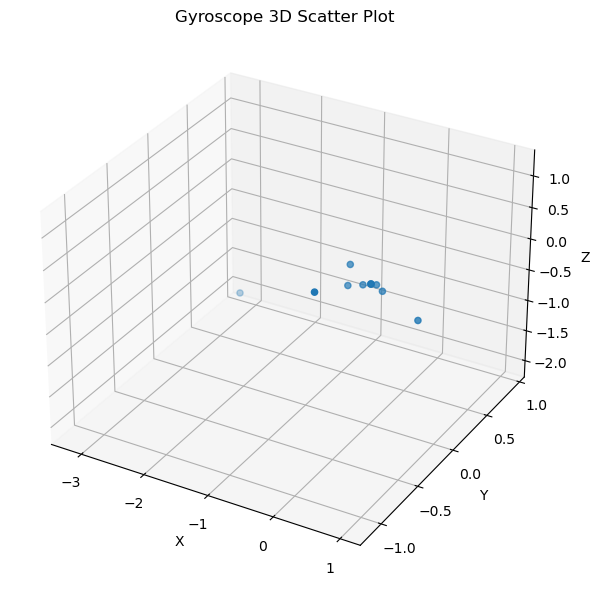

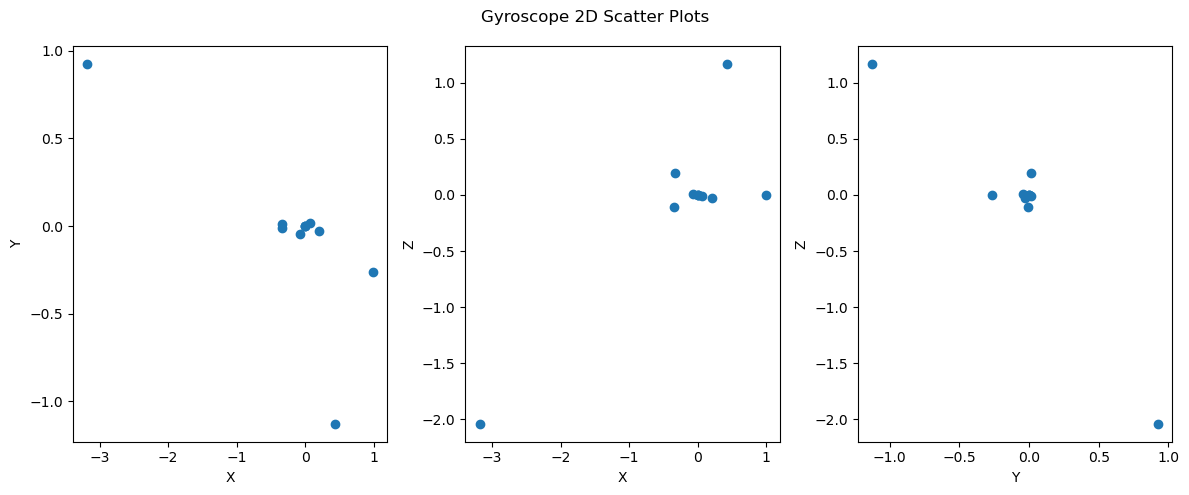

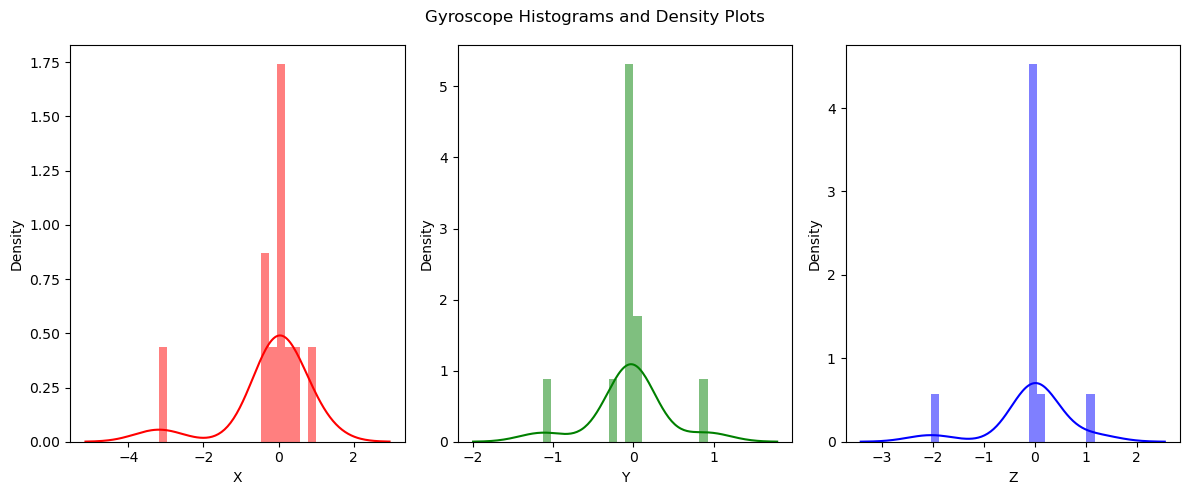

In [9]:
# Plot a scatter plot of the gyroscope
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gyroscope['x'], gyroscope['y'], gyroscope['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Gyroscope 3D Scatter Plot')
plt.tight_layout()
plt.show()

# Plot the scatter plot of the gyroscope
# Create a 2D scatter plot
# Plot with subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].scatter(gyroscope['x'], gyroscope['y'])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(gyroscope['x'], gyroscope['z'])
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')

ax[2].scatter(gyroscope['y'], gyroscope['z'])
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')

plt.suptitle('Gyroscope 2D Scatter Plots')
plt.tight_layout()
plt.show()


# Plot histograms and density of the gyroscope
# Create a histogram and density plot
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].hist(gyroscope['x'], bins=20, density=True, alpha=0.5, color='r')
sns.kdeplot(gyroscope['x'], ax=ax[0], color='r')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Density')

ax[1].hist(gyroscope['y'], bins=20, density=True, alpha=0.5, color='g')
sns.kdeplot(gyroscope['y'], ax=ax[1], color='g')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Density')

ax[2].hist(gyroscope['z'], bins=20, density=True, alpha=0.5, color='b')
sns.kdeplot(gyroscope['z'], ax=ax[2], color='b')
ax[2].set_xlabel('Z')
ax[2].set_ylabel('Density')

plt.suptitle('Gyroscope Histograms and Density Plots')
plt.tight_layout()
plt.show()

Generamos gráficos de scatter en dos y tres dimensiones para visualizar los cambios en la intensidad del campo magnético, gráficos de histogramas y densidad para visualizar la distribución de las lecturas del magnetómetro a lo largo de cada eje (x, y, z). a partir de los datos del magnetometer.

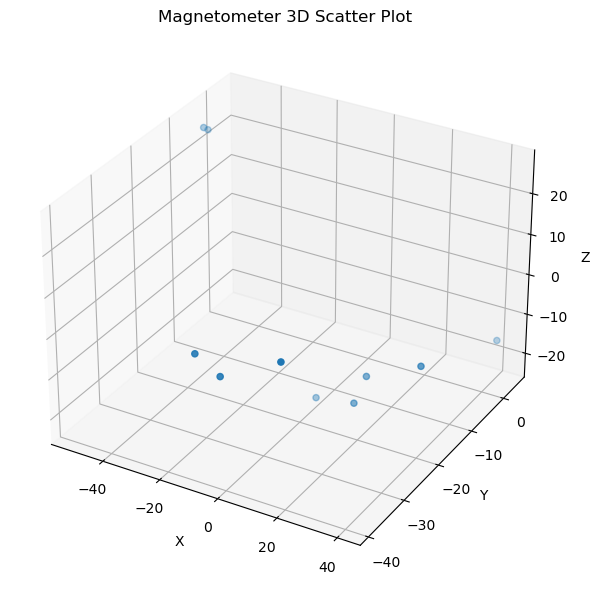

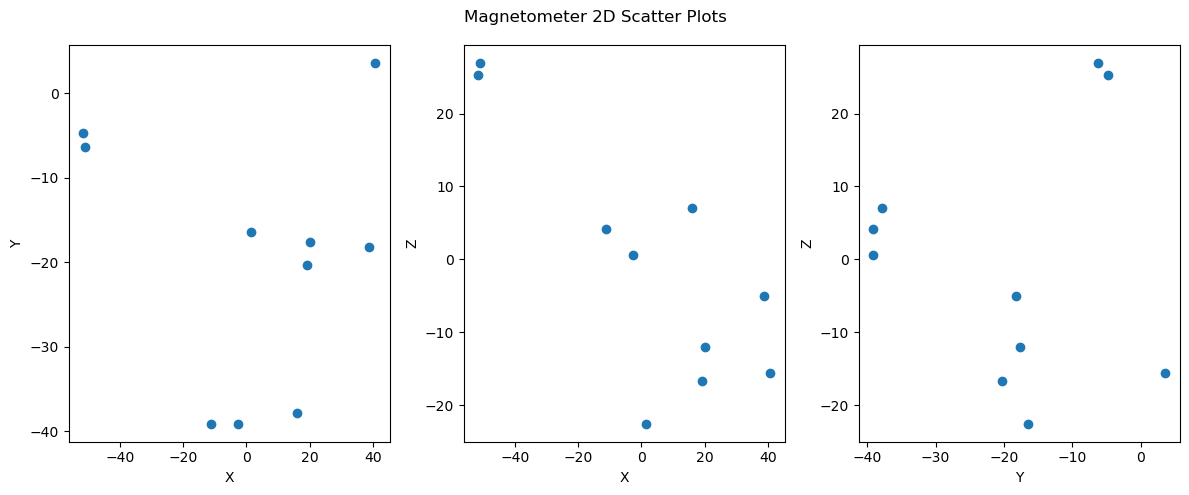

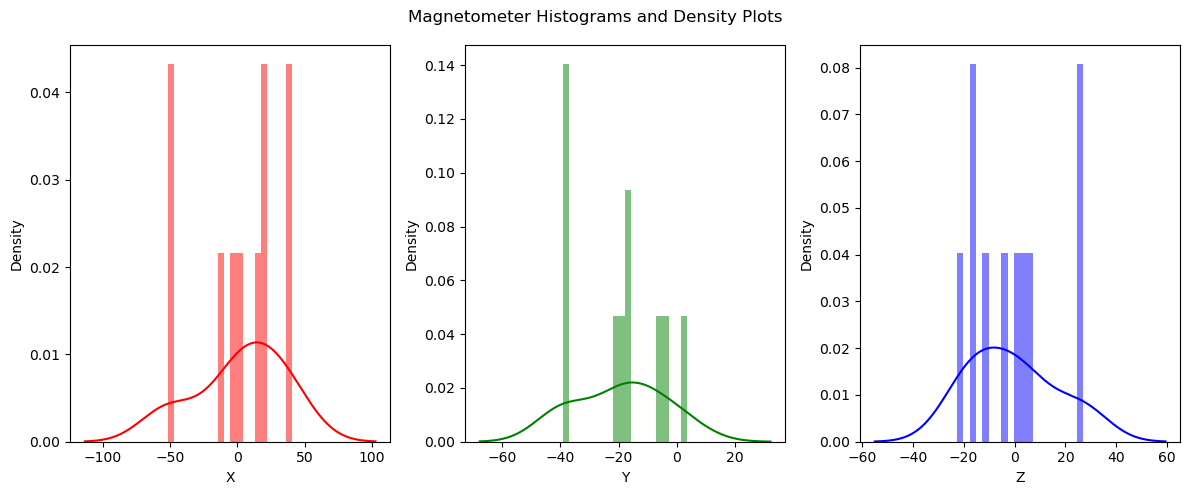

In [10]:
# Plot a scatter plot of the magnetometer
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(magnetometer['x'], magnetometer['y'], magnetometer['z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Magnetometer 3D Scatter Plot')
plt.tight_layout()
plt.show()

# Plot the scatter plot of the magnetometer
# Create a 2D scatter plot
# Plot with subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].scatter(magnetometer['x'], magnetometer['y'])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

ax[1].scatter(magnetometer['x'], magnetometer['z'])
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')

ax[2].scatter(magnetometer['y'], magnetometer['z'])
ax[2].set_xlabel('Y')
ax[2].set_ylabel('Z')

plt.suptitle('Magnetometer 2D Scatter Plots')
plt.tight_layout()
plt.show()


# Plot histograms and density of the magnetometer
# Create a histogram and density plot
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
ax[0].hist(magnetometer['x'], bins=20, density=True, alpha=0.5, color='r')
sns.kdeplot(magnetometer['x'], ax=ax[0], color='r')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Density')

ax[1].hist(magnetometer['y'], bins=20, density=True, alpha=0.5, color='g')
sns.kdeplot(magnetometer['y'], ax=ax[1], color='g')
ax[1].set_xlabel('Y')
ax[1].set_ylabel('Density')

ax[2].hist(magnetometer['z'], bins=20, density=True, alpha=0.5, color='b')
sns.kdeplot(magnetometer['z'], ax=ax[2], color='b')
ax[2].set_xlabel('Z')
ax[2].set_ylabel('Density')

plt.suptitle('Magnetometer Histograms and Density Plots')
plt.tight_layout()
plt.show()